# Project 1: Sentiment Analysis on Movie Reviews

This project is an individual project. In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive 1 and 0 for negative).

**NOTE:**
Please use IMDB 50k reviews dataset

# Data Exploration: Exploring the Dataset



In [1]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
df.describe()



review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [4]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Data Preproccessing

Here are some common preproccessing steps, feel free to add more preproccessing steps if needed: 
1. check missing values. 
2. remove noise and special characters, such as "\[[^]]*\]", etc.
3. transform all words to lower case, 
4. word tokenization  
5. stop words removing and stemming,
6. divide the dataset into train set (75%) and test set (25%) with random sampling

 ......


In [5]:
#check missing values in data
df.isnull()

review  sentiment
0       False      False
1       False      False
2       False      False
3       False      False
4       False      False
...       ...        ...
49995   False      False
49996   False      False
49997   False      False
49998   False      False
49999   False      False

[50000 rows x 2 columns]

In [6]:
df.fillna(0)

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

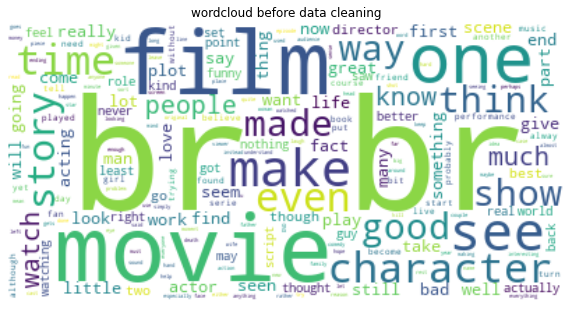

In [8]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df['review'].tolist())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white")
wordcloud.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("wordcloud before data cleaning")
plt.show()

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [10]:
corpus = []
ps = PorterStemmer()
sw = stopwords.words('english')

for i in range(0,50000):
    #remove noise and special characters
    imdb = re.sub('[^a-zA-Z]',' ',df['review'][i])
    #transforming all words to lower case
    imdb = imdb.lower()
    imdb = imdb.split()
    #stopwords removing and stemming
    imdb = [ps.stem(word) for word in imdb if not word in set(sw)]
    imdb = ' '.join(imdb)
    corpus.append(imdb)

corpus

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [11]:
df.review = corpus
df.sentiment = [1 if s == 'positive' else 0 for s in df.sentiment]
df

review  sentiment
0      one review mention watch oz episod hook right ...          1
1      wonder littl product br br film techniqu unass...          1
2      thought wonder way spend time hot summer weeke...          1
3      basic famili littl boy jake think zombi closet...          0
4      petter mattei love time money visual stun film...          1
...                                                  ...        ...
49995  thought movi right good job creativ origin fir...          1
49996  bad plot bad dialogu bad act idiot direct anno...          0
49997  cathol taught parochi elementari school nun ta...          0
49998  go disagre previou comment side maltin one sec...          0
49999  one expect star trek movi high art fan expect ...          0

[50000 rows x 2 columns]

In [12]:
len(corpus)

50000

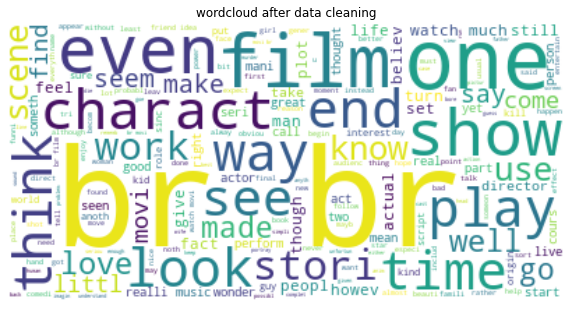

In [13]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df['review'].tolist())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white")
wordcloud.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("wordcloud after data cleaning")
plt.show()

In [14]:
train = corpus[:40000]
test = corpus[40000:]
y_train = df[:40000]['sentiment']
y_test = df[40000:]['sentiment']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2000, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.review).toarray()
labels = df.sentiment
features.shape

(50000, 407)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

x_train, x_test, y_train, y_test = train_test_split(df["review"], df['sentiment'],test_size=0.2, random_state=42)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)
x_test_counts = count_vect.transform(x_test)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

In [17]:
x_test_tfidf.shape

(10000, 62725)

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train)
x_train_tok = tokenizer.texts_to_sequences(train)
x_test_tok = tokenizer.texts_to_sequences(test)


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [20]:
x_train_tok

[[4,
  235,
  364,
  12,
  2502,
  191,
  1606,
  111,
  545,
  106,
  1,
  1,
  31,
  34,
  2777,
  2502,
  1117,
  18,
  496,
  88,
  111,
  292,
  27,
  1339,
  20,
  4898,
  327,
  8196,
  20,
  583,
  1660,
  1040,
  593,
  313,
  496,
  3134,
  238,
  64,
  292,
  1,
  1,
  156,
  2502,
  6204,
  308,
  9946,
  5135,
  1855,
  513,
  1125,
  1300,
  423,
  3330,
  1901,
  756,
  1791,
  1741,
  870,
  203,
  231,
  3560,
  2416,
  423,
  274,
  44,
  9416,
  3177,
  8444,
  5258,
  989,
  897,
  2007,
  230,
  2013,
  5259,
  400,
  6644,
  6423,
  50,
  150,
  165,
  1,
  1,
  15,
  38,
  204,
  789,
  20,
  601,
  103,
  198,
  20,
  1502,
  669,
  105,
  275,
  1035,
  2170,
  180,
  669,
  610,
  669,
  737,
  2502,
  725,
  108,
  31,
  191,
  55,
  131,
  2777,
  1367,
  1753,
  38,
  1431,
  12,
  363,
  933,
  2502,
  115,
  7360,
  231,
  444,
  1198,
  496,
  496,
  5065,
  2796,
  1702,
  2481,
  4118,
  102,
  462,
  11,
  165,
  17,
  944,
  582,
  557,
  4118,
  93,

In [21]:
x_test_tok

[[31,
  49,
  38,
  3284,
  2108,
  578,
  1875,
  181,
  2,
  1723,
  365,
  12,
  143,
  3536,
  3,
  2,
  328,
  283,
  95,
  179,
  353,
  95,
  1257,
  81,
  240,
  3,
  312,
  46,
  29,
  381,
  9,
  614,
  63,
  177,
  533,
  14,
  7,
  369,
  35,
  331,
  23,
  72,
  10,
  196,
  243,
  65,
  37,
  629,
  2234,
  9,
  2,
  4063,
  208,
  1072,
  133,
  430,
  15,
  46,
  1451,
  284,
  1723,
  2,
  571,
  3276,
  1328,
  1491,
  38,
  1414],
 [573,
  10,
  1952,
  15,
  188,
  1270,
  968,
  181,
  20,
  73,
  280,
  77,
  160,
  488,
  11,
  23,
  7,
  2460,
  68,
  150,
  927,
  11,
  239,
  1431,
  821,
  207,
  821,
  540,
  132,
  282,
  218,
  16,
  158,
  73,
  821,
  9,
  1227,
  1470,
  1172,
  233,
  421,
  4081,
  3851,
  3177,
  421,
  33,
  272,
  359,
  110,
  574,
  968,
  56,
  53,
  169,
  578,
  1602,
  105,
  7,
  42,
  10,
  11,
  57,
  1,
  1,
  1635,
  575,
  1662,
  17,
  21,
  826,
  65,
  5,
  978,
  30,
  385,
  16,
  245,
  12,
  79,
  191,
  1,
  1,


In [196]:
words = []
for sentence in corpus:
    words.append(sentence.split())

In [197]:
words = [word for sublist in words for word in sublist]
words

['one',
 'review',
 'mention',
 'watch',
 'oz',
 'episod',
 'hook',
 'right',
 'exactli',
 'happen',
 'br',
 'br',
 'first',
 'thing',
 'struck',
 'oz',
 'brutal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'heart',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'hardcor',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'call',
 'oz',
 'nicknam',
 'given',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'focus',
 'mainli',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privaci',
 'high',
 'agenda',
 'em',
 'citi',
 'home',
 'mani',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffl',
 'death',
 'stare',
 'dodgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'away',
 'br',
 'br',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',
 'show',
 'dare',
 'forget',
 'prett

# Data Modelling

* The below models are used to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers
    * CNN


# Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
lg = LogisticRegression()
lg.fit(x_train_tfidf, y_train)
y_pred_lg = lg.predict(x_test_tfidf)
cr_lg = classification_report(y_test, y_pred_lg)
acc_lg = accuracy_score(y_test, y_pred_lg)
print(cr_lg)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Linear SVC

In [199]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(x_train_tfidf, y_train)
y_pred_lsvc = lsvc.predict(x_test_tfidf)
cr_lsvc = classification_report(y_test, y_pred_lsvc)
acc_lsvc = accuracy_score(y_test, y_pred_lsvc)
print(cr_lsvc)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# KNN

In [200]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train_tfidf, y_train)
y_pred_knn = knn.predict(x_test_tfidf)
cr_knn = classification_report(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4961
           1       0.76      0.82      0.79      5039

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



# Fully Connected Layers

In [201]:
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [202]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)


In [203]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu')
clf2= MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic')
clf3 = MLPClassifier(hidden_layer_sizes=(10, 5, 2), activation='tanh')

In [204]:
clf1.fit(x_train_tfidf, y_train)
acc_clf1 = clf1.score(x_test_tfidf, y_test)
print(acc_clf1)

0.8799


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [205]:
clf2.fit(x_train_tfidf, y_train)
acc_clf2 = clf2.score(x_test_tfidf, y_test)
print(acc_clf2)

0.8984


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [206]:
clf3.fit(x_train_tfidf, y_train)
acc_clf3 = clf3.score(x_test_tfidf, y_test)
print(acc_clf3)

0.8893


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# CNN

In [207]:
maxlen = 100
x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen)
x_test_pad = pad_sequences(x_test_seq, maxlen=maxlen)
results = []

In [208]:
embedding_vector_length = 32
model = Sequential()
#model.add(Embedding(max_features, embedding_vector_length, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.fit(x_train_pad, y_train, validation_data=(x_test_pad, y_test), epochs=10, batch_size=128)
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=0)
results.append(("3 dense layers with a flatten layer",loss,accuracy))

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 4.8976 - accuracy: 0.0037 - val_loss: 4.9387 - val_accuracy: 0.0015
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 4.8948 - accuracy: 7.2500e-04 - val_loss: 4.9400 - val_accuracy: 6.0000e-04
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 4.8950 - accuracy: 5.0000e-04 - val_loss: 4.9400 - val_accuracy: 6.0000e-04
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 4.8950 - accuracy: 5.0000e-04 - val_loss: 4.9400 - val_accuracy: 6.0000e-04
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 4.8950 - accuracy: 5.0000e-04 - val_loss: 4.9400 - val_accuracy: 6.0000e-04
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 4.8950 - accuracy: 5.0000e-04 - val_loss: 4.9400 - val_accuracy: 6.0000e-04
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 4.8950 - accuracy: 5.0000e-04 - va

In [209]:
model.summary()
print("The loss is",loss)
print("The accuracy is",accuracy)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 100)               0         
                                                                 
 dense_104 (Dense)           (None, 16)                1616      
                                                                 
 dense_105 (Dense)           (None, 1)                 17        
                                                                 
 dense_106 (Dense)           (None, 10)                20        
                                                                 
Total params: 1,653
Trainable params: 1,653
Non-trainable params: 0
_________________________________________________________________
The loss is 4.940031051635742
The accuracy is 0.0006000000284984708


In [210]:
embedding_vector_length = 32
model = Sequential()
#model.add(Embedding(max_features, embedding_vector_length, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='tanh'))
#model.add(Dense(16, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.fit(x_train_pad, y_train, validation_data=(x_test_pad, y_test), epochs=10, batch_size=128)
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=0)
results.append(("two dense layers with a flatten layer",loss,accuracy))

Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 7.6845 - accuracy: 0.5006 - val_loss: 7.7552 - val_accuracy: 0.4972
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 7.6892 - accuracy: 0.5013 - val_loss: 7.7516 - val_accuracy: 0.4973
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 7.6961 - accuracy: 0.5010 - val_loss: 7.7521 - val_accuracy: 0.4974
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 7.6876 - accuracy: 0.5015 - val_loss: 7.7554 - val_accuracy: 0.4972
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 7.6895 - accuracy: 0.5015 - val_loss: 7.7554 - val_accuracy: 0.4972
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 7.6895 - accuracy: 0.5015 - val_loss: 7.7554 - val_accuracy: 0.4972
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 7.6895 - accuracy: 0.5015 - val_loss: 7.7554 - val_accuracy: 0.4972
Epoch 

In [211]:
model.summary()
print("The loss is",loss)
print("The accuracy is",accuracy)

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 100)               0         
                                                                 
 dense_107 (Dense)           (None, 16)                1616      
                                                                 
 dense_108 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________
The loss is 7.755423545837402
The accuracy is 0.49720001220703125


In [212]:
embedding_vector_length = 32
model = Sequential()
#model.add(Embedding(max_features, embedding_vector_length, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Dense(1, activation='tanh'))
#model.add(Dense(16, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.fit(x_train_pad, y_train, validation_data=(x_test_pad, y_test), epochs=10, batch_size=128)
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=0)
results.append(("1 dense and a flatten layer with 0.5 dropout",loss,accuracy))

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 7.6951 - accuracy: 0.0362 - val_loss: 7.6940 - val_accuracy: 0.0049
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 7.6959 - accuracy: 0.0210 - val_loss: 7.6802 - val_accuracy: 0.0154
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 7.6842 - accuracy: 0.0177 - val_loss: 7.6836 - val_accuracy: 0.0038
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 7.6888 - accuracy: 0.0095 - val_loss: 7.6697 - val_accuracy: 0.0025
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 7.6902 - accuracy: 0.0106 - val_loss: 7.6695 - val_accuracy: 0.0023
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 7.6812 - accuracy: 0.0148 - val_loss: 7.6560 - val_accuracy: 0.0051
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 7.6658 - accuracy: 0.0174 - val_loss: 7.6611 - val_accuracy: 0.0054
Epoch 

In [213]:
model.summary()
print("The loss is",loss)
print("The accuracy is",accuracy)

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 100)               0         
                                                                 
 dense_109 (Dense)           (None, 16)                1616      
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
Total params: 1,616
Trainable params: 1,616
Non-trainable params: 0
_________________________________________________________________
The loss is 7.655984401702881
The accuracy is 0.0052999998442828655


In [214]:
df_results = pd.DataFrame(results, columns=['Layers', 'Loss', 'Accuracy'])
df_results

Layers      Loss  Accuracy
0           3 dense layers with a flatten layer  4.940031    0.0006
1         two dense layers with a flatten layer  7.755424    0.4972
2  1 dense and a flatten layer with 0.5 dropout  7.655984    0.0053

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


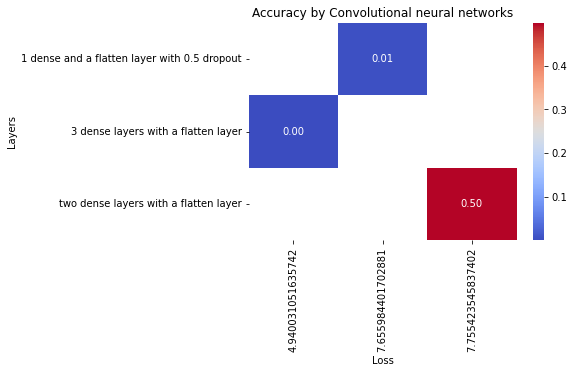

In [215]:
table = pd.pivot_table(df_results, values='Accuracy', index='Layers', columns='Loss')
sns.heatmap(table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Accuracy by Convolutional neural networks')
plt.show()

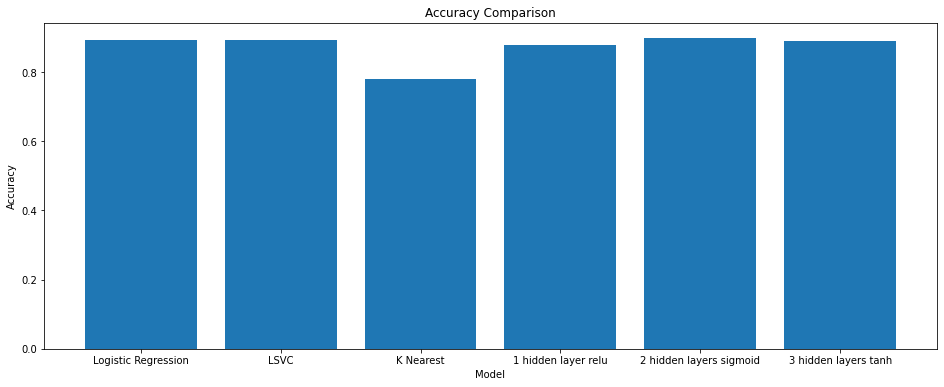

In [216]:
accuracies = [acc_lg,acc_lsvc,acc_knn,acc_clf1,acc_clf2,acc_clf3]
models = ['Logistic Regression', 'LSVC', 'K Nearest','1 hidden layer relu','2 hidden layers sigmoid','3 hidden layers tanh']
plt.figure(figsize= (16,6))
plt.bar(range(len(accuracies)), accuracies)
plt.xticks(range(len(accuracies)), models)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

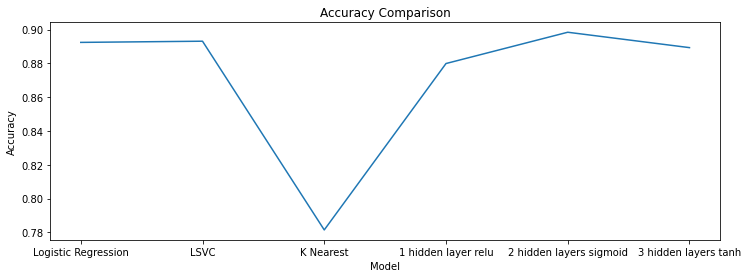

In [217]:
plt.figure(figsize= (12,4))
plt.plot(range(len(accuracies)), accuracies)
plt.xticks(range(len(accuracies)), models)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

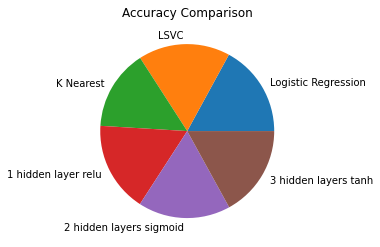

In [218]:
plt.pie(accuracies, labels=models)
plt.title('Accuracy Comparison')
plt.show()